In [526]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [527]:
train_df = pd.read_csv('C:/Users/User/Desktop/work_projects/brain_signals/2/2024_data_real_train.csv', sep=';')
test_df = pd.read_csv('C:/Users/User/Desktop/work_projects/brain_signals/2/2024_data_real_test.csv', sep=';')

In [528]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,1.856605,1.687823,-31.815463,8.607897,-22.514737,6.384776,0.421956,-2.784908,-32.406201,9.789373,...,4.388340,8.607897,1.092133,6.216756,-6.160554,-10.211329,-5.654207,7.595203,-8.569042,3.276398
1,-20.841751,-34.824192,-17.060336,-20.138232,-17.596128,-22.673617,-19.170894,-28.052821,-9.321627,-14.510080,...,-17.236216,3.693475,-14.181954,-6.390634,-9.497507,-6.155791,-13.630681,7.299010,-10.067436,-0.962972
2,13.592906,7.312639,2.752994,10.409757,1.627212,7.536559,9.463415,6.624391,2.666963,11.872285,...,1.720621,2.236807,1.370283,4.539064,-1.204435,6.710422,-0.602217,2.666963,-0.085643,4.367778
3,1.031896,8.911826,-2.251409,13.977496,1.307394,11.019460,3.658539,10.881809,0.375235,15.759861,...,8.067548,-2.251409,7.564205,3.828795,8.911826,8.255165,6.285183,-0.562852,7.190664,5.416345
4,-1.596751,-2.973260,-0.715785,-2.808079,-1.041425,0.164436,1.761932,1.211328,2.092294,-0.880966,...,-5.285796,2.147355,-2.576156,1.863602,2.973260,1.596751,-4.900373,3.358683,-2.192473,3.179086


In [529]:
class_distribution_train = train_df['class'].value_counts()
class_distribution_train

class
0    651
1    349
Name: count, dtype: int64

In [530]:
# class_distribution_test = test_df['class'].value_counts()
# class_distribution_test

# Разбиение датафрейма на 6 датафреймов для разных каналов

In [531]:
train_dfs_raw = []

for i in range(6):
    df_new = train_df.iloc[:, i::6]

    if df_new.shape[1] > 0 and df_new.columns[-1] == 'class':
        df_new.drop('class', axis=1, inplace=True)

    new_columns_names = [str(i) for i in range(250)]
    df_new.columns = new_columns_names


    train_dfs_raw.append(df_new)

train_df_raw_0 = train_dfs_raw[0]
train_df_raw_1 = train_dfs_raw[1]
train_df_raw_2 = train_dfs_raw[2]
train_df_raw_3 = train_dfs_raw[3]
train_df_raw_4 = train_dfs_raw[4]
train_df_raw_5 = train_dfs_raw[5]

In [532]:
train_df_raw_2.iloc[:5, -5:]


,245,246,247,248,249
0,-3.853238,1.888842,10.124193,16.621810,16.395149
1,6.324667,9.521004,13.397412,17.069799,19.110014
2,0.739909,0.284581,0.170748,0.569161,0.682993
3,-1.257883,-1.796975,-2.455866,-2.455866,-2.276169
4,-9.570204,-9.107129,-7.563548,-5.865609,-4.167669


Тест

In [533]:
test_dfs_raw = []

for i in range(6):
    df_new = test_df.iloc[:, i::6]

    new_columns_names = [str(i) for i in range(250)]
    df_new.columns = new_columns_names


    test_dfs_raw.append(df_new)

test_df_raw_0 = test_dfs_raw[0]
test_df_raw_1 = test_dfs_raw[1]
test_df_raw_2 = test_dfs_raw[2]
test_df_raw_3 = test_dfs_raw[3]
test_df_raw_4 = test_dfs_raw[4]
test_df_raw_5 = test_dfs_raw[5]

In [534]:
test_df_raw_5.iloc[:5, -5:]

,245,246,247,248,249
0,-1.596194,-2.688327,2.688327,6.216756,3.276398
1,-5.427661,-7.353606,-8.754292,-6.390634,-0.962972
2,-1.884140,0.942070,3.254423,4.539064,4.367778
3,-2.241246,-1.867705,0.653697,3.828795,5.416345
4,-0.876989,-0.164436,0.767366,1.863602,3.179086


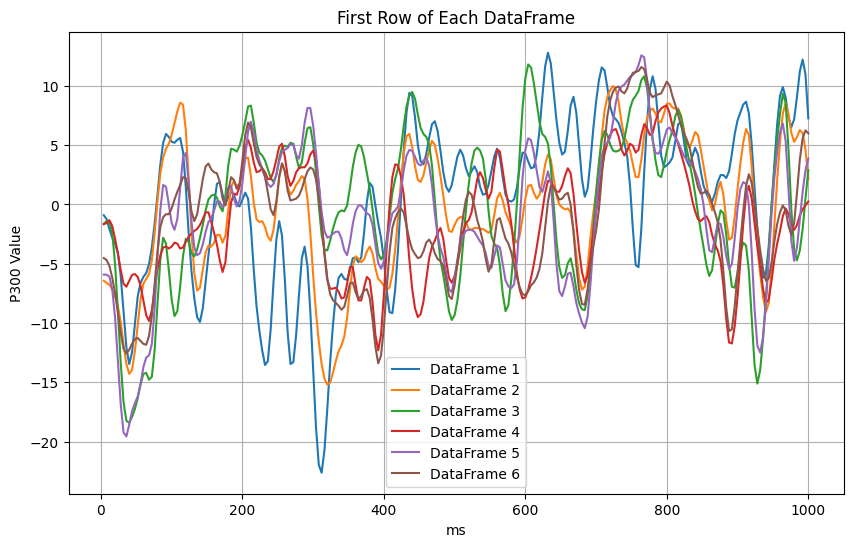

In [535]:
t_vals = np.arange(1, 251) * 4

plt.figure(figsize=(10,6))
for i, df in enumerate(train_dfs_raw):
    y_vals = df.iloc[8, :250]
    plt.plot(t_vals, y_vals, label=f'DataFrame {i+1}')

plt.xlabel('ms')
plt.ylabel('P300 Value')
plt.title('First Row of Each DataFrame')
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Применение скользящего среднего

In [536]:
window_size = 10

def smoothing_row(df, window_size):
    smoothed_df = df.apply(lambda row: row.rolling(window=window_size, min_periods=1).mean(), axis=1)
    return smoothed_df

train_dfs_raw_smooth = [smoothing_row(df, window_size) for df in train_dfs_raw]

Тест

In [537]:
def smoothing_row(df, window_size):
    smoothed_df = df.apply(lambda row: row.rolling(window=window_size, min_periods=1).mean(), axis=1)
    return smoothed_df

test_dfs_raw_smooth = [smoothing_row(df, window_size) for df in test_dfs_raw]

In [538]:
train_dfs_raw_smooth[0].head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,9.519764,9.066442,8.789411,8.613120,8.462012,8.298313,8.051864,7.640366,7.018097,6.218068,...,-5.122540,-3.588800,-2.228834,-1.193748,-0.400435,0.468433,1.760401,3.649243,6.074516,8.756672
1,-3.808401,-3.366355,-3.287013,-3.434362,-3.549974,-3.434362,-3.060323,-2.524766,-1.987321,-1.570966,...,-0.326434,1.462154,2.781493,3.597579,3.937615,3.849206,3.386757,2.645479,1.754585,0.816086
2,5.691611,4.524831,3.490855,2.845805,2.618141,2.646599,2.772628,2.916951,3.054498,3.164536,...,2.993787,3.693855,4.080885,4.194717,4.115035,3.915828,3.671089,3.449116,3.284059,3.124694
3,3.593951,3.474152,3.334388,3.174657,3.030899,2.945043,2.866604,2.725413,2.489144,2.192310,...,-13.177820,-13.357517,-13.477316,-13.423406,-13.105941,-12.530909,-11.788159,-11.033429,-10.320629,-9.613818
4,5.788430,5.402534,4.785102,4.283438,3.967004,3.717458,3.539211,3.502000,3.610265,3.774056,...,0.957020,0.169794,-0.640586,-1.551299,-2.616370,-3.735467,-4.754230,-5.572328,-6.182043,-6.598810


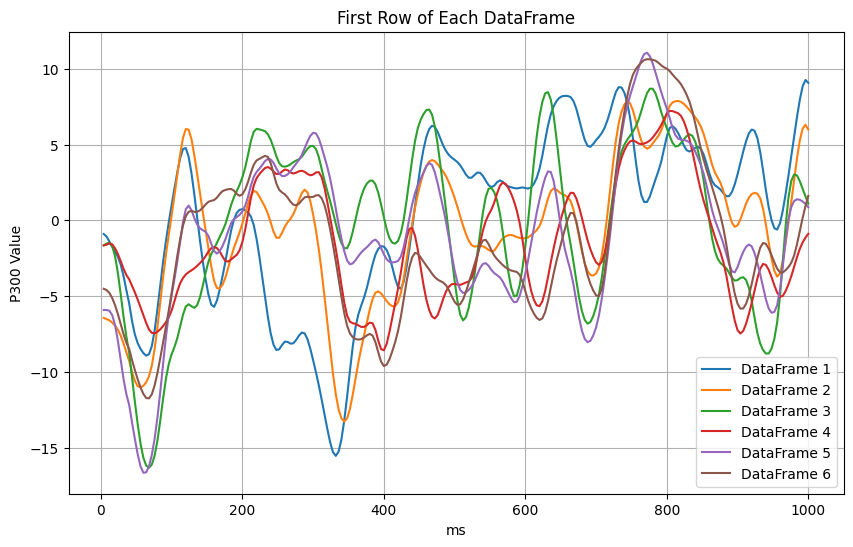

In [539]:
t_vals = np.arange(1, 251) * 4

plt.figure(figsize=(10,6))
for i, df in enumerate(train_dfs_raw_smooth):
    y_vals = df.iloc[8, :250]
    plt.plot(t_vals, y_vals, label=f'DataFrame {i+1}')

plt.xlabel('ms')
plt.ylabel('P300 Value')
plt.title('First Row of Each DataFrame')
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Обрезание сигнала [200ms - 800ms]

In [540]:
train_dfs_raw_cut_smooth = []

for df in train_dfs_raw_smooth:
    df = df.iloc[:, 50:-50]
    train_dfs_raw_cut_smooth.append(df)

train_df_raw_cut_0 = train_dfs_raw_cut_smooth[0]

Тест

In [541]:
test_dfs_raw_cut_smooth = []

for df in test_dfs_raw_smooth:
    df = df.iloc[:, 50:-50]
    test_dfs_raw_cut_smooth.append(df)

test_df_raw_cut_0 = test_dfs_raw_cut_smooth[0]

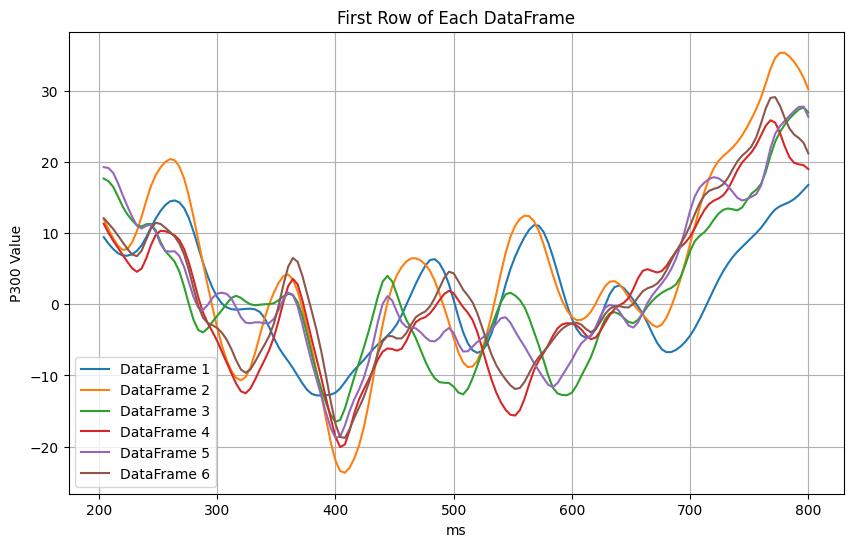

In [542]:
t_vals = np.arange(51, 201) * 4

plt.figure(figsize=(10,6))
for i, df in enumerate(test_dfs_raw_cut_smooth):
    y_vals = df.iloc[0, :150]
    plt.plot(t_vals, y_vals, label=f'DataFrame {i+1}')

plt.xlabel('ms')
plt.ylabel('P300 Value')
plt.title('First Row of Each DataFrame')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [543]:
train_df_raw_cut_0

,50,51,52,53,54,55,56,57,58,59,...,190,191,192,193,194,195,196,197,198,199
0,-11.393495,-11.605045,-11.695710,-11.469049,-10.622847,-9.005999,-6.686501,-3.906125,-0.891533,2.191057,...,6.361620,3.362139,0.045332,-3.279030,-6.406952,-9.202438,-11.529492,-13.259671,-14.241869,-14.347644
1,0.272029,1.088115,1.870197,2.495863,2.910707,3.243942,3.651985,4.168839,4.733299,5.290958,...,-2.060617,-2.135425,-2.482262,-3.033120,-3.767597,-4.644890,-5.556186,-6.351869,-6.936731,-7.249564
2,-2.436009,-3.551565,-4.302858,-4.792336,-5.190749,-5.583470,-5.862359,-5.833901,-5.401339,-4.632971,...,-1.047256,-0.136599,0.865125,1.792857,2.595375,3.289751,3.887370,4.354082,4.638663,4.678504
3,-0.167718,-0.047919,0.119798,0.269546,0.371375,0.407314,0.377365,0.293506,0.179698,0.101829,...,6.121696,5.906059,5.660473,5.528694,5.588594,5.774281,5.977938,6.169616,6.355303,6.499061
4,3.851235,3.071727,2.168732,1.265737,0.540253,0.216101,0.439921,1.188558,2.184167,3.133470,...,-7.455497,-7.162217,-6.969269,-6.992423,-7.247114,-7.640727,-8.003469,-8.165545,-8.049776,-7.741060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16.562551,15.613461,14.450361,13.017421,11.296032,9.425766,7.685768,6.317962,5.471225,5.201385,...,0.949090,2.261067,3.563740,4.875717,6.141171,7.201918,7.843950,8.048655,8.011436,7.974217
996,4.971340,6.653857,8.729157,10.939293,12.932519,14.491925,15.617511,16.332728,16.508601,15.957532,...,-15.570612,-17.253129,-18.150081,-18.150081,-17.358653,-16.074781,-14.538824,-12.826995,-10.997917,-9.192289
997,-1.366078,-6.398535,-11.007947,-15.079742,-18.464091,-20.984726,-22.509446,-23.011810,-22.535886,-21.275569,...,10.408636,11.360484,12.188944,13.087912,14.216028,15.449905,16.498701,17.115640,17.362415,17.503430
998,-17.891468,-18.965197,-19.483965,-19.520159,-19.140131,-18.374043,-17.276185,-15.900846,-14.248027,-12.402177,...,-4.234596,-4.427626,-4.361272,-3.993308,-3.287542,-2.286199,-1.103890,0.144772,1.502015,3.028158


# Нейросеть CNN-LSTM

In [544]:
# Convert each dataframe to a NumPy array and stack them
data_arrays = [df.values for df in train_dfs_raw_cut_smooth]  # List of arrays with shape [500, 150]
data = np.stack(data_arrays, axis=1)  # Shape: [500, 6, 150]

# Convert labels to NumPy array (ensure it's binary: 0 or 1)
labels = train_df.iloc[:, -1].values  # Shape: [500]


In [545]:
class SignalDataset(Dataset):
    def __init__(self, data, labels):
        """
        Args:
            data (numpy.ndarray): Array of shape [num_samples, channels, time_steps]
            labels (numpy.ndarray): Array of shape [num_samples]
        """
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


In [546]:
from torch.utils.data import DataLoader, Subset
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

# Create Dataset instances
train_dataset = SignalDataset(X_train, y_train)
test_dataset = SignalDataset(X_test, y_test)

# Now, let's balance the test dataset
# Get indices for each class
class_0_indices = np.where(y_test == 0)[0]
class_1_indices = np.where(y_test == 1)[0]

# We will take the minimum length of both classes to ensure balance
min_class_size = min(len(class_0_indices), len(class_1_indices))

# Select a random subset of indices from each class to balance the test dataset
class_0_sampled = np.random.choice(class_0_indices, min_class_size, replace=False)
class_1_sampled = np.random.choice(class_1_indices, min_class_size, replace=False)

# Combine the indices
balanced_indices = np.concatenate([class_0_sampled, class_1_sampled])

# Create a balanced test dataset
balanced_test_dataset = Subset(test_dataset, balanced_indices)

# Create DataLoader for the balanced test set
batch_size = 32
test_loader = DataLoader(balanced_test_dataset, batch_size=batch_size, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [547]:
class CNN_LSTM_Model(nn.Module):
    def __init__(self, num_channels=6, time_steps=150, cnn_out_channels=32, 
                 cnn_kernel_size=3, lstm_hidden_size=64, lstm_num_layers=2, 
                 num_classes=2, dropout=0.3):
        super(CNN_LSTM_Model, self).__init__()
        
        # CNN component
        self.conv1 = nn.Conv1d(in_channels=num_channels, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size, padding=1)
        self.bn1 = nn.BatchNorm1d(cnn_out_channels)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        
        # Calculate the new time_steps after Conv and Pooling
        self.conv_output_time_steps = time_steps // 2  # After MaxPool with kernel_size=2
        
        # LSTM component
        self.lstm = nn.LSTM(input_size=cnn_out_channels, 
                            hidden_size=lstm_hidden_size, 
                            num_layers=lstm_num_layers, 
                            batch_first=True, 
                            dropout=dropout)
        
        # Fully connected layer
        self.fc = nn.Linear(lstm_hidden_size, num_classes)
        
        # Dropout
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        """
        Args:
            x: Tensor of shape [batch_size, channels, time_steps]
        Returns:
            out: Tensor of shape [batch_size, num_classes]
        """
        # CNN layers
        x = self.conv1(x)  # [batch, cnn_out_channels, time_steps]
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)  # [batch, cnn_out_channels, time_steps/2]
        
        # Prepare for LSTM: transpose to [batch, time_steps, features]
        x = x.permute(0, 2, 1)  # [batch, time_steps/2, cnn_out_channels]
        
        # LSTM layers
        lstm_out, (hn, cn) = self.lstm(x)  # lstm_out: [batch, time_steps/2, lstm_hidden_size]
        
        # Take the last time step's output
        out = lstm_out[:, -1, :]  # [batch, lstm_hidden_size]
        
        out = self.dropout(out)
        out = self.fc(out)  # [batch, num_classes]
        
        return out

In [548]:
import torch
import torch.nn as nn
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Assuming `labels` is already defined (e.g., the target labels for training)
# Convert labels to a numpy array if they are not already
labels = np.array(labels)

# Calculate class weights (use sklearn.utils.class_weight)
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Instantiate the model
model = CNN_LSTM_Model()
model.to(device)

# Use weighted loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Define optimizer (Adam optimizer with a learning rate of 1e-3)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


Using device: cpu


In [549]:
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import numpy as np

num_epochs = 30  # Adjust based on convergence
best_auc = 0.0
best_model_path = 'best_cnn_lstm_model_auc.pth'

# Outer loop with tqdm for epoch tracking
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    all_preds_prob_train = []  # Store predicted probabilities on training data
    all_targets_train = []  # Store true labels on training data
    
    # Use tqdm for batch-level progress
    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as batch_progress:
        for batch_idx, (signals, targets) in enumerate(batch_progress):
            signals = signals.to(device)  # [batch, 6, 150]
            targets = targets.to(device)  # [batch]
            
            # Forward pass
            outputs = model(signals)  # [batch, 2]
            loss = criterion(outputs, targets)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            # Store predicted probabilities (softmax outputs) for AUC calculation
            prob = torch.softmax(outputs, dim=1)  # [batch, 2]
            all_preds_prob_train.extend(prob.cpu().detach().numpy())  # Store in CPU for AUC calculation
            all_targets_train.extend(targets.cpu().numpy())  # Store true labels in CPU
            
            # Update tqdm with current loss for each batch
            batch_progress.set_postfix(loss=running_loss / (batch_idx + 1))
    
    avg_loss = running_loss / len(train_loader)

    # Calculate AUC on the training data (to track training progress)
    auc_train = roc_auc_score(all_targets_train, np.array(all_preds_prob_train)[:, 1])  # AUC for the positive class (class 1)
    
    # Print AUC and loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Train AUC: {auc_train:.4f}')
    
    # Evaluate on the test set for AUC after every epoch
    model.eval()
    all_preds_prob_test = []  # Store predicted probabilities on test data
    all_targets_test = []  # Store true labels on test data

    with torch.no_grad():
        for signals, targets in test_loader:
            signals = signals.to(device)
            targets = targets.to(device)
            
            outputs = model(signals)
            prob = torch.softmax(outputs, dim=1)  # [batch, 2]
            
            all_preds_prob_test.extend(prob.cpu().numpy())
            all_targets_test.extend(targets.cpu().numpy())
    
    # Calculate AUC on the test data
    auc_test = roc_auc_score(all_targets_test, np.array(all_preds_prob_test)[:, 1])
    print(f'Epoch [{epoch+1}/{num_epochs}], Test AUC: {auc_test:.4f}')
    
    # Save the model with the best AUC on the test set
    if auc_test > best_auc:
        best_auc = auc_test
        torch.save(model.state_dict(), best_model_path)
        print(f'Best model saved with AUC: {best_auc:.4f}')

# After training, load the best model and evaluate it on the test data
model.load_state_dict(torch.load(best_model_path))
model.eval()

# Final evaluation on the test set (for the record)
all_preds_prob_test_final = []
all_targets_test_final = []

with torch.no_grad():
    for signals, targets in test_loader:
        signals = signals.to(device)
        targets = targets.to(device)
        
        outputs = model(signals)
        prob = torch.softmax(outputs, dim=1)  # [batch, 2]
        
        all_preds_prob_test_final.extend(prob.cpu().numpy())
        all_targets_test_final.extend(targets.cpu().numpy())

# Calculate final AUC on the test data
final_auc_test = roc_auc_score(all_targets_test_final, np.array(all_preds_prob_test_final)[:, 1])
print(f'Final Test AUC: {final_auc_test:.4f}')


Epoch 1/30: 100%|██████████| 25/25 [00:00<00:00, 30.03batch/s, loss=0.69] 


Epoch [1/30], Loss: 0.6897, Train AUC: 0.5522
Epoch [1/30], Test AUC: 0.6416
Best model saved with AUC: 0.6416


Epoch 2/30: 100%|██████████| 25/25 [00:00<00:00, 33.76batch/s, loss=0.668]


Epoch [2/30], Loss: 0.6677, Train AUC: 0.6336
Epoch [2/30], Test AUC: 0.6553
Best model saved with AUC: 0.6553


Epoch 3/30: 100%|██████████| 25/25 [00:00<00:00, 34.31batch/s, loss=0.667]


Epoch [3/30], Loss: 0.6674, Train AUC: 0.6288
Epoch [3/30], Test AUC: 0.6343


Epoch 4/30: 100%|██████████| 25/25 [00:00<00:00, 34.31batch/s, loss=0.663]


Epoch [4/30], Loss: 0.6634, Train AUC: 0.6372
Epoch [4/30], Test AUC: 0.6563
Best model saved with AUC: 0.6563


Epoch 5/30: 100%|██████████| 25/25 [00:00<00:00, 34.13batch/s, loss=0.659]


Epoch [5/30], Loss: 0.6591, Train AUC: 0.6522
Epoch [5/30], Test AUC: 0.6812
Best model saved with AUC: 0.6812


Epoch 6/30: 100%|██████████| 25/25 [00:00<00:00, 36.15batch/s, loss=0.646]


Epoch [6/30], Loss: 0.6464, Train AUC: 0.6706
Epoch [6/30], Test AUC: 0.7100
Best model saved with AUC: 0.7100


Epoch 7/30: 100%|██████████| 25/25 [00:00<00:00, 35.99batch/s, loss=0.64] 


Epoch [7/30], Loss: 0.6395, Train AUC: 0.6854
Epoch [7/30], Test AUC: 0.6965


Epoch 8/30: 100%|██████████| 25/25 [00:00<00:00, 32.07batch/s, loss=0.637]


Epoch [8/30], Loss: 0.6368, Train AUC: 0.6893
Epoch [8/30], Test AUC: 0.7237
Best model saved with AUC: 0.7237


Epoch 9/30: 100%|██████████| 25/25 [00:00<00:00, 32.87batch/s, loss=0.618]


Epoch [9/30], Loss: 0.6178, Train AUC: 0.7248
Epoch [9/30], Test AUC: 0.7263
Best model saved with AUC: 0.7263


Epoch 10/30: 100%|██████████| 25/25 [00:00<00:00, 33.26batch/s, loss=0.607]


Epoch [10/30], Loss: 0.6074, Train AUC: 0.7371
Epoch [10/30], Test AUC: 0.7269
Best model saved with AUC: 0.7269


Epoch 11/30: 100%|██████████| 25/25 [00:00<00:00, 35.79batch/s, loss=0.572]


Epoch [11/30], Loss: 0.5717, Train AUC: 0.7742
Epoch [11/30], Test AUC: 0.7669
Best model saved with AUC: 0.7669


Epoch 12/30: 100%|██████████| 25/25 [00:00<00:00, 35.43batch/s, loss=0.517]


Epoch [12/30], Loss: 0.5174, Train AUC: 0.8250
Epoch [12/30], Test AUC: 0.7833
Best model saved with AUC: 0.7833


Epoch 13/30: 100%|██████████| 25/25 [00:00<00:00, 26.06batch/s, loss=0.471]


Epoch [13/30], Loss: 0.4707, Train AUC: 0.8574
Epoch [13/30], Test AUC: 0.7827


Epoch 14/30: 100%|██████████| 25/25 [00:01<00:00, 23.96batch/s, loss=0.438]


Epoch [14/30], Loss: 0.4383, Train AUC: 0.8776
Epoch [14/30], Test AUC: 0.7957
Best model saved with AUC: 0.7957


Epoch 15/30: 100%|██████████| 25/25 [00:00<00:00, 31.78batch/s, loss=0.39] 


Epoch [15/30], Loss: 0.3904, Train AUC: 0.9058
Epoch [15/30], Test AUC: 0.7835


Epoch 16/30: 100%|██████████| 25/25 [00:00<00:00, 34.08batch/s, loss=0.368]


Epoch [16/30], Loss: 0.3679, Train AUC: 0.9128
Epoch [16/30], Test AUC: 0.8067
Best model saved with AUC: 0.8067


Epoch 17/30: 100%|██████████| 25/25 [00:00<00:00, 35.89batch/s, loss=0.33] 


Epoch [17/30], Loss: 0.3304, Train AUC: 0.9308
Epoch [17/30], Test AUC: 0.8239
Best model saved with AUC: 0.8239


Epoch 18/30: 100%|██████████| 25/25 [00:00<00:00, 35.38batch/s, loss=0.269]


Epoch [18/30], Loss: 0.2686, Train AUC: 0.9539
Epoch [18/30], Test AUC: 0.8137


Epoch 19/30: 100%|██████████| 25/25 [00:00<00:00, 34.41batch/s, loss=0.279]


Epoch [19/30], Loss: 0.2792, Train AUC: 0.9516
Epoch [19/30], Test AUC: 0.7949


Epoch 20/30: 100%|██████████| 25/25 [00:00<00:00, 34.03batch/s, loss=0.273]


Epoch [20/30], Loss: 0.2727, Train AUC: 0.9555
Epoch [20/30], Test AUC: 0.8114


Epoch 21/30: 100%|██████████| 25/25 [00:00<00:00, 33.94batch/s, loss=0.254]


Epoch [21/30], Loss: 0.2537, Train AUC: 0.9583
Epoch [21/30], Test AUC: 0.8045


Epoch 22/30: 100%|██████████| 25/25 [00:00<00:00, 35.68batch/s, loss=0.215]


Epoch [22/30], Loss: 0.2154, Train AUC: 0.9716
Epoch [22/30], Test AUC: 0.8145


Epoch 23/30: 100%|██████████| 25/25 [00:00<00:00, 35.84batch/s, loss=0.191]


Epoch [23/30], Loss: 0.1909, Train AUC: 0.9766
Epoch [23/30], Test AUC: 0.8106


Epoch 24/30: 100%|██████████| 25/25 [00:00<00:00, 36.04batch/s, loss=0.182]


Epoch [24/30], Loss: 0.1816, Train AUC: 0.9785
Epoch [24/30], Test AUC: 0.8386
Best model saved with AUC: 0.8386


Epoch 25/30: 100%|██████████| 25/25 [00:00<00:00, 35.58batch/s, loss=0.186]


Epoch [25/30], Loss: 0.1861, Train AUC: 0.9783
Epoch [25/30], Test AUC: 0.8302


Epoch 26/30: 100%|██████████| 25/25 [00:00<00:00, 35.28batch/s, loss=0.135]


Epoch [26/30], Loss: 0.1346, Train AUC: 0.9893
Epoch [26/30], Test AUC: 0.8004


Epoch 27/30: 100%|██████████| 25/25 [00:00<00:00, 33.80batch/s, loss=0.147]


Epoch [27/30], Loss: 0.1472, Train AUC: 0.9863
Epoch [27/30], Test AUC: 0.8161


Epoch 28/30: 100%|██████████| 25/25 [00:00<00:00, 34.55batch/s, loss=0.167]


Epoch [28/30], Loss: 0.1670, Train AUC: 0.9813
Epoch [28/30], Test AUC: 0.8114


Epoch 29/30: 100%|██████████| 25/25 [00:00<00:00, 34.22batch/s, loss=0.107] 


Epoch [29/30], Loss: 0.1065, Train AUC: 0.9915
Epoch [29/30], Test AUC: 0.8280


Epoch 30/30: 100%|██████████| 25/25 [00:00<00:00, 34.94batch/s, loss=0.109] 
C:\Users\User\AppData\Local\Temp\ipykernel_27756\101319587.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experime

Epoch [30/30], Loss: 0.1087, Train AUC: 0.9907
Epoch [30/30], Test AUC: 0.8159
Final Test AUC: 0.8386


In [550]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the best model
model.load_state_dict(torch.load('best_cnn_lstm_model_auc.pth'))
model.eval()

# Final evaluation on the test set
all_preds = []
all_targets = []

with torch.no_grad():
    for signals, targets in test_loader:
        signals = signals.to(device)
        targets = targets.to(device)
        
        outputs = model(signals)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Calculate final accuracy
final_accuracy = accuracy_score(all_targets, all_preds)

# Calculate confusion matrix
final_cm = confusion_matrix(all_targets, all_preds)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = final_cm.ravel()

# Print the accuracy and confusion matrix in a readable way
print(f'Final Test Accuracy: {final_accuracy:.4f}')
print(f'Final Confusion Matrix (readable format):')
print(f'True Negative (TN): {TN}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')
print(f'True Positive (TP): {TP}')

# Classification Report (precision, recall, F1-score)
print("\nClassification Report:\n", classification_report(all_targets, all_preds))

# Optionally, you can print the confusion matrix in the usual format as well
print(f'\nConfusion Matrix (standard format):\n{final_cm}')

# Create the Comparison Table: True Labels vs Predicted Labels
comparison_df = pd.DataFrame({
    'True Label': all_targets,
    'Predicted Label': all_preds
})

print("\nComparison of True and Predicted Labels (first 10 rows):")
print(comparison_df.head(10))  # Display the first 10 rows for inspection


C:\Users\User\AppData\Local\Temp\ipykernel_27756\1752453437.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_cnn_lstm_model_auc.pth

Final Test Accuracy: 0.7571
Final Confusion Matrix (readable format):
True Negative (TN): 58
False Positive (FP): 12
False Negative (FN): 22
True Positive (TP): 48

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77        70
           1       0.80      0.69      0.74        70

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.76      0.76      0.76       140


Confusion Matrix (standard format):
[[58 12]
 [22 48]]

Comparison of True and Predicted Labels (first 10 rows):
   True Label  Predicted Label
0           0                0
1           0                0
2           0                0
3           0                0
4           0                0
5           0                0
6           0                0
7           0                0
8           0                0
9           0                0


# Предсказание модели

In [551]:
# Convert each dataframe in test_dfs_raw_smooth to a NumPy array and stack them
test_data_arrays = [df.values for df in test_dfs_raw_cut_smooth]  # List of arrays with shape [N, 150]
test_data = np.stack(test_data_arrays, axis=1)  # Shape: [N, 6, 150]

# Create a Dataset instance for test-only (without labels)
class TestOnlyDataset(Dataset):
    def __init__(self, data):
        """
        Args:
            data (numpy.ndarray): Array of shape [num_samples, channels, time_steps]
        """
        self.data = torch.tensor(data, dtype=torch.float32)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

# Create a DataLoader for `test_dfs_raw_smooth` (features only)
test_only_dataset = TestOnlyDataset(test_data)
batch_size = 32
test_only_loader = DataLoader(test_only_dataset, batch_size=batch_size, shuffle=False)

# Use the trained model to make predictions on the test data (features only)
model.eval()  # Set model to evaluation mode

all_preds = []

# Iterate over the test-only loader and make predictions
with torch.no_grad():
    for signals in test_only_loader:
        signals = signals.to(device)  # Move to GPU if needed
        
        outputs = model(signals)  # Get model output
        _, preds = torch.max(outputs, 1)  # Get predicted class (0 or 1)
        
        all_preds.extend(preds.cpu().numpy())  # Store predictions on CPU

# all_preds now contains all the predicted class labels (0 or 1)
print(f'Predicted classes for the test set: {all_preds}')


Predicted classes for the test set: [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]


In [552]:
len(all_preds)

50

In [553]:
folder_path = 'C:/Users/User/Desktop/work_projects/brain_signals/2'

In [554]:
import os
# Ensure the folder exists, create it if necessary
os.makedirs(folder_path, exist_ok=True)


# Convert predictions to binary string
binary_string = ''.join([str(pred) for pred in all_preds])

# Define the full file path
file_path = os.path.join(folder_path, 'predictions.csv')

# Write the binary string to the CSV file without any headers or index
with open(file_path, 'w') as f:
    f.write(binary_string)

print(f"File saved to: {file_path}")

File saved to: C:/Users/User/Desktop/work_projects/brain_signals/2\predictions.csv


In [555]:
answer = pd.read_csv('C:/Users/User/Desktop/work_projects/brain_signals/2/predictions.csv')

In [556]:
answer

,11011001000001101001101110110110110000100010010000
